### The Sparks Foundation - Data Science & Business Analytics Intership

### Task 2 - Prediction Using Unsupervised Machine Learing 

##### In this it is required to predict the optimum number of  cluster for the .iris data set consists of 3 types of flower namely iris-setosa iris-versicolour and iris-virginica 

## Importing the data

#### In this step we will import the required libraries and data set with the help of pandas library

In [2]:
#importin the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
#reading data iris dataset
df=pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualising the data

#### In this step we will try to visualize our dataset

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 6)

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
# now we will drop the label column beacuse it is an unsupervised learing problem
iris=pd.DataFrame(df)
iris_df=iris.drop(columns=['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the Optimun number of clusters

#### Before clustering the data using kmeans , we need to specify the number of cluster. In order to find the optimum number of cluster,there are various method available like silhouette coeffient and the Elbow method. Here,the elbow method is used.

## About Elbow Method:- 

#### In this Method the number of cluster are varies within a Certain range. For each number, within-cluster sum  of square (wss) value is calculated and stored in the list. These value are then plotted against the ramge of number of cluster used before. The location of bend in the 2nd plot indicates the appropriate number of clusters.

In [16]:
# calulating the within-cluster sum of square

within_cluster_sum_of_sq =[]

cluster_range=range(1,15)
for k in cluster_range:
    km=KMeans(n_clusters=k)
    km=km.fit(iris_df)
    within_cluster_sum_of_sq.append(km.inertia_)

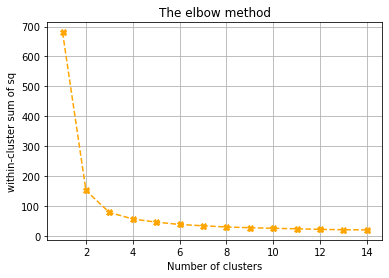

In [19]:
#ploting 

plt.plot(cluster_range,within_cluster_sum_of_sq,'X--',color='orange')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of sq')
plt.grid()
plt.show()

###### here, we clearly see that why it is called "The elbow method" from the above graph, the optimun clusters is where the elbow occurs. This is when the cluster sum od squares (WCSS) doen't decreses significally with every iteration.

##### From these we choose the number of cluster as 3.

#### Applying k means clustering on the data

In [21]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters = 3, init='k-means++',max_iter=300,n_init=10,random_state=0)
predictions=model.fit_predict(iris_df)

## Visualising the cluster

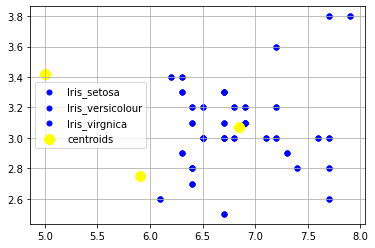

In [24]:
x=iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=25,c='blue',label="Iris_setosa")
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=25,c='blue',label="Iris_versicolour")
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=25,c='blue',label="Iris_virgnica")

#ploting the cluster centers

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.legend()
plt.grid()
plt.show()

## ThankYou:))